In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

In [2]:
dfi=pd.read_csv('D:\\vk\\TRIM 3\\ML\\DATASET\\insurance.csv')

In [3]:
dfi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
dfi.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
dfi.shape

(1338, 7)

In [6]:
dfi.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [7]:
x=dfi['age']

In [8]:
y=dfi['charges']

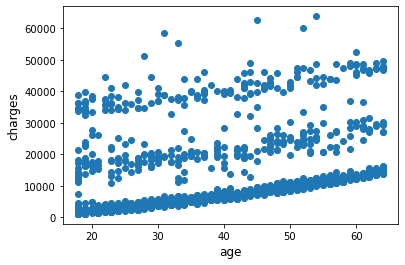

In [9]:
plt.scatter(x,y)
plt.xlabel('age',fontsize=12)
plt.ylabel('charges',fontsize=12)
plt.show()

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='charges'>

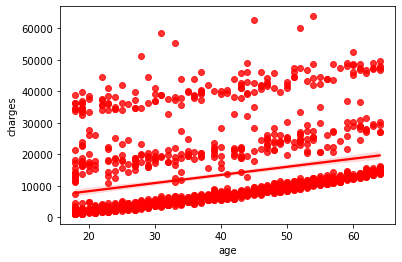

In [10]:
sns.regplot(x,y,color='red')


In [11]:
x.shape

(1338,)

In [12]:
X_=x.values.reshape(-1,1) # regression model only accepts the array value

In [13]:
X_.shape

(1338, 1)

In [14]:
x

0       19
1       18
2       28
3       33
4       32
        ..
1333    50
1334    18
1335    18
1336    21
1337    61
Name: age, Length: 1338, dtype: int64

In [15]:
X_

array([[19],
       [18],
       [28],
       ...,
       [18],
       [21],
       [61]], dtype=int64)

<AxesSubplot:>

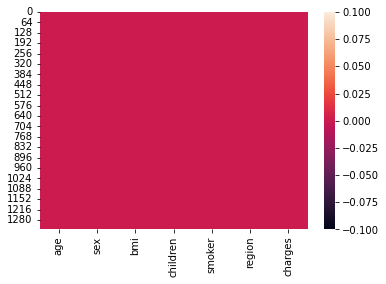

In [16]:
sns.heatmap(dfi.isnull())

### Dividing

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X_,y,test_size=0.3,random_state=69)

In [18]:
X_train.shape

(936, 1)

In [19]:
X_test.shape

(402, 1)

In [20]:
LR=LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [21]:
y_pred=LR.predict(X_test)


In [22]:
y_pred

array([10649.86098303, 17889.81849944, 10649.86098303, 13787.17590681,
       14028.50782402, 18131.15041665, 10167.1971486 , 11615.18865188,
       17889.81849944, 16683.15891337, 16200.49507894, 17889.81849944,
       10649.86098303,  7753.87797647, 10167.1971486 , 18131.15041665,
       10408.52906582, 16200.49507894,  8960.53756254, 18855.14616829,
       18613.81425108, 18855.14616829, 11856.5205691 ,  7995.20989368,
       10408.52906582, 17889.81849944,  9925.86523139, 14511.17165845,
       18855.14616829, 12580.51632074, 13787.17590681, 15235.16741009,
        9925.86523139, 18372.48233387,  7995.20989368, 12821.84823795,
       14028.50782402, 18372.48233387, 11373.85673467, 10891.19290024,
        7995.20989368, 12097.85248631,  8477.87372811, 11132.52481746,
       18613.81425108, 13304.51207238,  8477.87372811,  8960.53756254,
       11615.18865188, 16683.15891337, 14269.83974123, 11132.52481746,
       15717.83124452,  9201.86947975, 10167.1971486 ,  7753.87797647,
      

In [23]:
y_test

780     18259.21600
1146    52590.82939
1032     4137.52270
1045    21880.82000
985      7624.63000
           ...     
539     27346.04207
978      9704.66805
1211    23563.01618
376     21659.93010
442      1149.39590
Name: charges, Length: 402, dtype: float64

In [24]:
acc=mean_squared_error(y_test,y_pred)
acc

146619179.3817428

In [25]:
weights = LR.coef_
intercept = LR.intercept_
print(weights,intercept)

[241.33191721] 3409.9034666223542


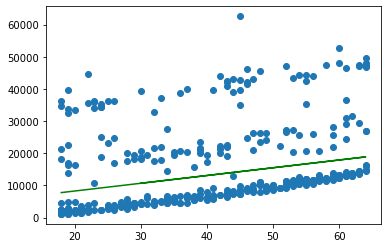

In [26]:
plt.scatter(X_test, y_test)
plt.plot(X_test,y_pred, color='green')
plt.show()

In [27]:
df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df

,Actual,Predicted
780,18259.21600,10649.860983
1146,52590.82939,17889.818499
1032,4137.52270,10649.860983
1045,21880.82000,13787.175907
985,7624.63000,14028.507824
...,...,...
539,27346.04207,16200.495079
978,9704.66805,14269.839741
1211,23563.01618,12821.848238
376,21659.93010,12821.848238


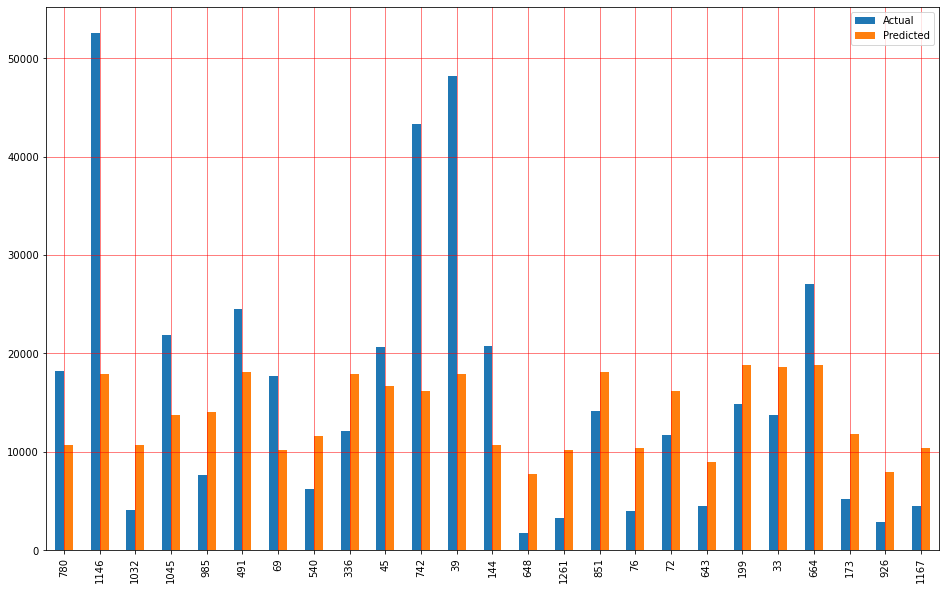

In [28]:

df1=df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major',linestyle='-',linewidth='0.5',color='red')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='green')
plt.show()

In [29]:
print('Mean Absolute Error',mean_absolute_error(y_test,y_pred))
print('Mean Squared Error',mean_squared_error(y_test,y_pred))
print('Root Mean Sqaured Error',np.sqrt(mean_squared_error(y_test,y_pred)))

Mean Absolute Error 9315.65448327068
Mean Squared Error 146619179.3817428
Root Mean Sqaured Error 12108.640690917491


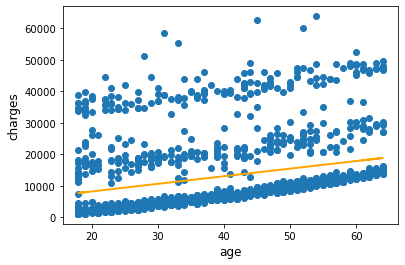

In [30]:
plt.scatter(x,y)
yhat=LR.coef_*x+LR.intercept_ #yhat=0.275+0.0017x1 regression line
fig=plt.plot(x,yhat,lw=2,c='orange',label='Regression Line')
plt.xlabel('age',fontsize='12')
plt.ylabel('charges',fontsize='12')
plt.show()